## Import Libraries

In [472]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [473]:
df=pd.read_csv('startup_funding.csv',encoding="latin1")

In [474]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,9/1/2020,BYJU?,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


## Understanding the Data

In [475]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,9/1/2020,BYJU?,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


## Data Cleaning

In [477]:
df.duplicated().any()

False

In [478]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [479]:
df=df.drop(columns='Remarks')

In [480]:
lst=['Sr No', 'Date','Startup Name','Industry Vertical','SubVertical','city','Investors Name','InvestmentnType','Amount USD']

In [481]:
df.columns=lst

In [482]:
df

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD
0,1,9/1/2020,BYJU?,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [483]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True,errors="coerce")

In [484]:
df['year']=df['Date'].dt.year.astype('Int64')

In [485]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",2020


In [486]:
df['Amount USD']=df['Amount USD'].str.replace(",","")  # Replace commas

In [487]:
df['Amount USD'] = pd.to_numeric(df['Amount USD'],errors='coerce')  # Convert string to neumeric

In [488]:
df['Amount USD']=df['Amount USD'].fillna(df['Amount USD'].mean())
df['InvestmentnType']=df['InvestmentnType'].fillna(df['InvestmentnType'].mode()[0])

In [489]:
for i in ['Industry Vertical','SubVertical','city']:
    df[i]=df[i].fillna('unknown')

In [490]:
df["Investors Name"]=df["Investors Name"].fillna("Not Disclosed")

In [491]:
df['Investors Name'] = df['Investors Name'].str.split(',')

In [492]:
df1=df.explode('Investors Name')

In [493]:
df1.shape

(5825, 10)

In [494]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5825 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              5825 non-null   int64         
 1   Date               5810 non-null   datetime64[ns]
 2   Startup Name       5825 non-null   object        
 3   Industry Vertical  5825 non-null   object        
 4   SubVertical        5825 non-null   object        
 5   city               5825 non-null   object        
 6   Investors Name     5825 non-null   object        
 7   InvestmentnType    5825 non-null   object        
 8   Amount USD         5825 non-null   float64       
 9   year               5810 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 506.3+ KB


In [495]:
df1.isnull().sum()

Sr No                 0
Date                 15
Startup Name          0
Industry Vertical     0
SubVertical           0
city                  0
Investors Name        0
InvestmentnType       0
Amount USD            0
year                 15
dtype: int64

In [496]:
df1 = df1.dropna(axis=0)

In [497]:
df1['Investors Name'] = df1['Investors Name'].str.strip()

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date               3036 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  3044 non-null   object        
 4   SubVertical        3044 non-null   object        
 5   city               3044 non-null   object        
 6   Investors Name     3044 non-null   object        
 7   InvestmentnType    3044 non-null   object        
 8   Amount USD         3044 non-null   float64       
 9   year               3036 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 240.9+ KB


In [499]:
df['InvestmentnType']= df['InvestmentnType'].str.lower().str.strip()

In [500]:
df

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,[Tiger Global Management],private equity round,2.000000e+08,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,[Susquehanna Growth Equity],series c,8.048394e+06,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[Sequoia Capital India],series b,1.835886e+07,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[Vinod Khatumal],pre-series a,3.000000e+06,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[Sprout Venture Partners],seed round,1.800000e+06,2020
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,unknown,unknown,unknown,[Asia Pacific Internet Group],private equity,4.500000e+06,2015
3040,3041,2015-01-29,Graphene,unknown,unknown,unknown,[KARSEMVEN Fund],private equity,8.250000e+05,2015
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,unknown,"[Exfinity Fund, GrowX Ventures.]",private equity,1.500000e+06,2015
3042,3043,2015-01-30,Simplotel,unknown,unknown,unknown,[MakeMyTrip],private equity,1.842990e+07,2015


In [501]:
# Normalize text first
df1['InvestmentnType'] = (
    df1['InvestmentnType']
    .str.lower()
    .str.strip()
    .str.replace(r'[\n\r\t]', ' ', regex=True)   # remove hidden chars
    .str.replace(r'\s+', ' ', regex=True)        # collapse multiple spaces
) 

In [502]:
df1['InvestmentnType'].unique()

array(['private equity round', 'series c', 'series b', 'pre-series a',
       'seed round', 'series a', 'series d', 'seed', 'series f',
       'series e', 'debt funding', 'series g', 'series h', 'venture',
       'seed funding', 'private equity', 'funding round',
       'corporate round', 'maiden round', 'seed funding round',
       'single venture', 'venture round', 'angel', 'series j',
       'angel round', 'venture - series unknown', 'bridge round',
       'debt and preference capital', 'inhouse funding',
       'seed/ angel funding', 'debt', 'pre series a', 'equity',
       'debt-funding', 'mezzanine', 'series b (extension)',
       'equity based funding', 'private funding', 'seed / angel funding',
       'seed/angel funding', 'seed / angle funding',
       'angel / seed funding', 'private', 'structured debt', 'term loan',
       'privateequity', 'angel funding', 'seed\\\\nfunding',
       'private\\\\nequity', 'crowd funding'], dtype=object)

In [503]:
# Angel
for val in ['angel funding', 'angel round', 'angel / seed funding','angel']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'angel funding')


In [504]:
# Seed
for val in ['seed round', 'seed funding', 'seed funding round', 
            'seed / angel funding', 'seed/ angel funding', 
            'seed / angle funding', 'seed/angel funding','seed\\\\nfunding','seed']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'seed funding')


In [505]:
# Pre-Series A
for val in ['pre series a', 'pre-series a']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'pre-series A')

In [506]:
# Debt
for val in ['debt funding', 'debt-funding', 'debt and preference capital', 
            'structured debt', 'term loan']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'debt funding')

In [507]:
# Private Equity
for val in ['private equity round', 'privateequity', 'private', 
            'private funding', 'private equity', 'private equity funding', 'private equity investment','private\\\\nequity']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'private equity')

In [508]:
# Equity
for val in ['equity based funding']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'equity')

In [509]:
# early Venture
for val in ['venture','venture round', 'venture - series unknown', 'single venture','series a','series b','series b (extension)','series c']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'early venture')

In [510]:
# mid Venture
for val in ['series b','series b (extension)','series c']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'mid-stage venture')

In [511]:
#late Venture
for val in ['series d','series e','series f']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'late-stage venture')

In [512]:
#pre-IPO
for val in ['series g','series h','series j']:
    df1['InvestmentnType'] = df1['InvestmentnType'].replace(val, 'pre-IPO')

In [513]:
df1['InvestmentnType'].unique()

array(['private equity', 'early venture', 'pre-series A', 'seed funding',
       'late-stage venture', 'debt funding', 'pre-IPO', 'funding round',
       'corporate round', 'maiden round', 'angel funding', 'bridge round',
       'inhouse funding', 'debt', 'equity', 'mezzanine', 'crowd funding'],
      dtype=object)

## Data Analysis

## Level 1

### 1. How many startups are present in the dataset?

In [514]:
df1['Startup Name'].unique().shape[0]

2453

### 2. Which year had the highest number of funding deals?

In [515]:
df.head(1)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,[Tiger Global Management],private equity round,200000000.0,2020


In [516]:
df['year'].value_counts().head(1)

year
2016    993
Name: count, dtype: Int64

### 3. Which city received the highest number of startup fundings?

In [517]:
df['city'].value_counts().head(1)

city
Bangalore    700
Name: count, dtype: int64

### 4. Find the most common investment type (Seed, Series A, Private Equity, etc.).

In [518]:
df1['InvestmentnType'].value_counts().head(1)

InvestmentnType
seed funding    2906
Name: count, dtype: int64

### 5. Which industry vertical received the highest overall funding?

In [519]:
df['Industry Vertical'].value_counts().head(1)

Industry Vertical
Consumer Internet    941
Name: count, dtype: int64

## Level 2

### 6. What are the top 10 most funded startups (by total funding amount)?

In [520]:
df.head(1)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,[Tiger Global Management],private equity round,200000000.0,2020


In [521]:
df.groupby('Startup Name')['Amount USD'].sum().sort_values(ascending=False).head(10)

Startup Name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.185810e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Snapdeal            7.000000e+08
Flipkart.com        7.000000e+08
Ola Cabs            6.881299e+08
True North          6.000000e+08
BigBasket           5.070000e+08
Name: Amount USD, dtype: float64

### 7. Which investors have invested in the highest number of startups?

In [522]:
df.head(1)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,[Tiger Global Management],private equity round,200000000.0,2020


In [523]:
df1.groupby('Investors Name')['Startup Name'].count().sort_values(ascending=False).head(1)

Investors Name
Sequoia Capital    72
Name: Startup Name, dtype: int64

### 8. Who are the top 10 investors by total invested amount?

In [524]:
df1.groupby('Investors Name')['Amount USD'].sum().sort_values(ascending=False).head(10)

Investors Name
Westbridge Capital      3.900000e+09
Softbank                3.545000e+09
SoftBank Group          2.487000e+09
Tiger Global            2.045400e+09
Sequoia Capital         1.730350e+09
Tencent Holdings        1.610000e+09
DST Global              1.492000e+09
eBay                    1.400000e+09
Microsoft               1.400000e+09
Vijay Shekhar Sharma    1.097549e+09
Name: Amount USD, dtype: float64

### 9. Find the average funding amount for each type of investment.

In [545]:
round(df1.groupby('InvestmentnType')['Amount USD'].mean(),2)

InvestmentnType
angel funding         9.843830e+06
bridge round          1.842990e+07
corporate round       2.825495e+07
crowd funding         7.788400e+04
debt                  1.842990e+07
debt funding          6.727608e+06
early venture         7.495121e+07
equity                3.325000e+07
funding round         1.000000e+09
inhouse funding       2.443495e+06
late-stage venture    1.214363e+08
maiden round          4.500000e+06
mezzanine             1.000000e+06
pre-IPO               9.771429e+07
pre-series A          8.880190e+06
private equity        2.480030e+07
seed funding          9.173971e+06
Name: Amount USD, dtype: float64

### 10. Which month of the year sees the most funding deals?

In [526]:
df['Month'] = df['Date'].dt.month

In [527]:
df.groupby('Month')['Amount USD'].max().head(1)

Month
1.0    200000000.0
Name: Amount USD, dtype: float64

### 11. How many startups received funding more than $100M? List them.

In [528]:
df[df['Amount USD']> 1000000000.0][['Startup Name','Amount USD']]

,Startup Name,Amount USD
60,Rapido Bike Taxi,3.900000e+09
651,Flipkart,2.500000e+09
830,Paytm,1.400000e+09
966,Flipkart,1.400000e+09


## Level 3

In [529]:
df.head(1)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year,Month
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,[Tiger Global Management],private equity round,200000000.0,2020,1.0


### 12. Which industries received the highest total funding?

In [530]:
industry_funding=df1.groupby('Industry Vertical')['Amount USD'].sum().sort_values(ascending=False).head(10)

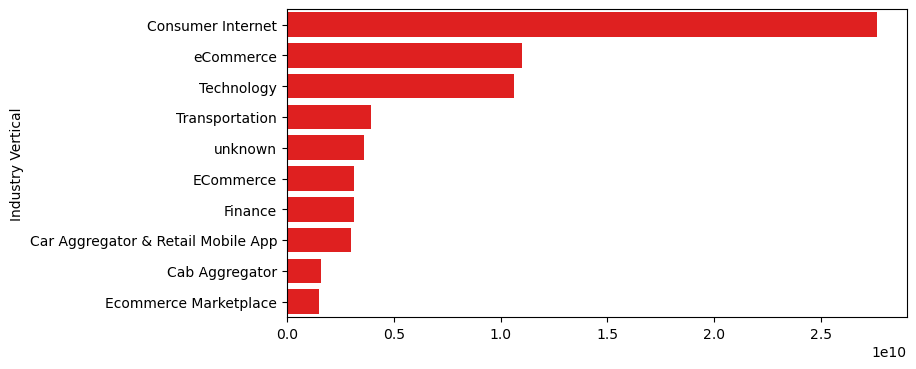

In [531]:
plt.figure(figsize=(8,4))
sns.barplot(x=industry_funding.values,y=industry_funding.index,color='red')
plt.show()

**Consumer Internet received the highest funding, and E-commerce and Technology showing these are the most investor attractive sectors.**

### 13.How many startups were funded each year?

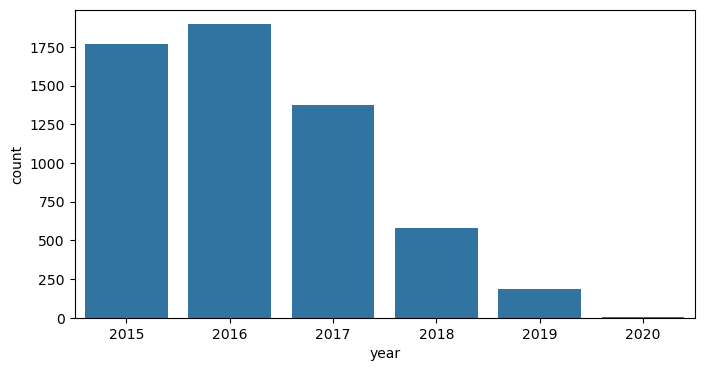

In [532]:
plt.figure(figsize=(8,4))
sns.countplot(df1,x='year')
plt.show()

**Most of the startup funding in 2016 and significantly less startup funding in 2015 and 2017**

### 14.Displaying the distribution of different investment type (Top 5) 

In [533]:
p =df1['InvestmentnType'].value_counts().sort_values(ascending=False).head()
p

InvestmentnType
seed funding          2906
private equity        2679
early venture          102
late-stage venture      33
debt funding            33
Name: count, dtype: int64

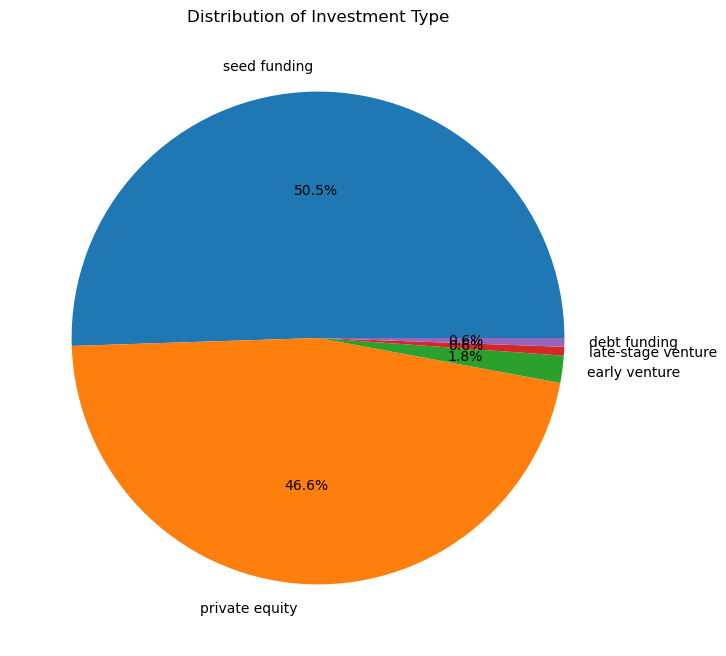

In [534]:
plt.figure(figsize=(10,8))
plt.pie(p.values,labels=p.index,autopct="%1.1f%%")
plt.title("Distribution of Investment Type")
plt.show()


**Observation: Seed funding and Private equity were the most common investment types**

### 15.Top 4 cities which startups were more funded

In [535]:
c=df1['city'].value_counts().head(4)
c

city
Bangalore    1445
Mumbai       1107
New Delhi     802
Gurgaon       561
Name: count, dtype: int64

<BarContainer object of 4 artists>

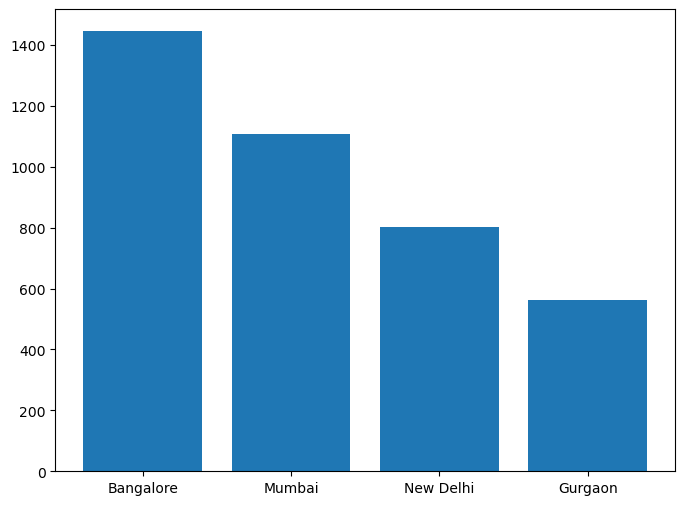

In [536]:
plt.figure(figsize=(8,6))
plt.bar(c.index,c.values)


**Observation: Bangalore, Mumbai, and New Delhi were the leading startup funding hubs.**

### 16. Top 10 Funding Raised Company

In [537]:
top_10_fund_raiser = df.groupby('Startup Name')['Amount USD'].sum().sort_values(ascending=False).head(5).reset_index()

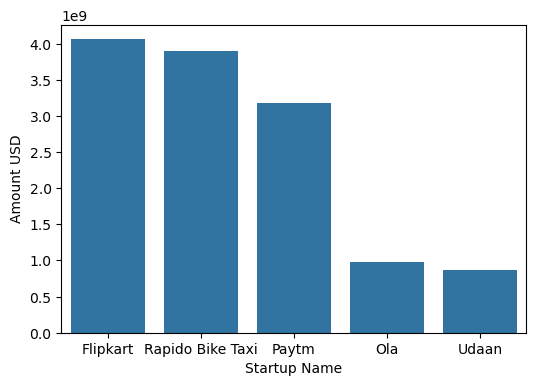

In [538]:
plt.figure(figsize=(6,4))
sns.barplot(top_10_fund_raiser,x='Startup Name', y='Amount USD')
plt.show()

**Observation: Flipkart, Paytm, Ola, and Rapido secured the largest funding amounts.**

In [539]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,city,Investors Name,InvestmentnType,Amount USD,year,Month
0,1,2020-01-09,BYJU?,E-Tech,E-learning,Bengaluru,[Tiger Global Management],private equity round,200000000.0,2020,1.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,[Susquehanna Growth Equity],series c,8048394.0,2020,1.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[Sequoia Capital India],series b,18358860.0,2020,1.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[Vinod Khatumal],pre-series a,3000000.0,2020,1.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[Sprout Venture Partners],seed round,1800000.0,2020,1.0


### 17. Total amount a investor had invested (Top 5 investors)

In [540]:
total_amount = df1.groupby('Investors Name')['Amount USD'].sum().sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 Investors by investment')

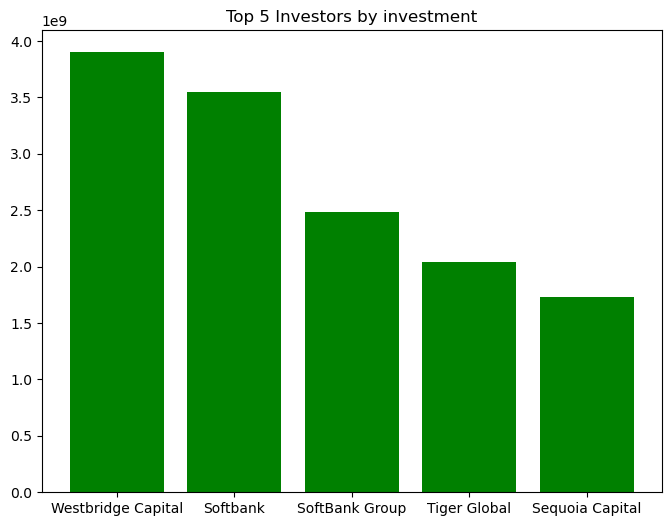

In [541]:
plt.figure(figsize=(8,6))
plt.bar(total_amount.index,total_amount.values, color='green')
plt.title("Top 5 Investors by investment")

**Observation: Westbridge Capital and Softbank invested the most money.**

**Conclusion: From the analysis, it is clear that Consumer Internet, E-commerce, and Technology sectors received the highest funding, showing investor confidence in digital businesses. The year-wise trend highlights that 2016 had the peak funding activity, while later years saw a decline. In investment types, Seed funding and Private equity dominated, showing both early-stage support and large-scale growth investments. Bangalore, Mumbai, and Delhi emerged as the top startup hubs. Among companies, Flipkart, Ola, Paytm, and Rapido raised the most funding. The top investors like Westbridge Capital, Softbank, and Sequoia Capital played a major role**